In [1]:
# get the necessary imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell

# i dont exactly know why
%matplotlib inline

# to display all columns.
pd.set_option('display.max_columns', None)

# to display multiple outputs from one cell.
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train = pd.read_csv("./train.csv")
train.head()
train.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 81)

In [3]:
test = pd.read_csv("./test.csv")
test.head()
test.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


(1459, 80)

In [4]:
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [5]:
train.select_dtypes('number').columns
train.select_dtypes('object').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [6]:
# joining train and test data, to fill in missing values. Save the ID , needed for making a submission.
train_ID = train['Id']
test_ID = test['Id']
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.SalePrice.values
full = pd.concat((train, test)).reset_index(drop=True)
full.drop(['SalePrice'], axis=1, inplace=True)
full.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(2919, 80)

In [7]:
full.info()
full.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,198,2919.000000,2919,2837,2837,2918.000000,2918.000000,2840,2839,2917.000000,2917.000000,2838,2918.000000,2919,2919,2919,2918,2919.000000,2919,2919,2918,2918,571,1499,2919.000000,2919,2919.000000,2917,2918.000000,2918.000000,2760,2760,2760,2762,2760.000000,2919.000000,2919.000000,2919,2919,2919,2919.000000,2919.000000,2918,2919,2919,2919.000000,2919,2433.000000,2919,2919.000000,2919.000000,2915,2896.000000,2895,105,2919.000000,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919,2919.000000,10,2919,2919,2919,2918,2919.000000,2919,2919.000000,2918.000000,2917,2919.000000,2919.000000,2919.000000,2919.000000
unique,NaN,NaN,NaN,2,NaN,5,4,4,NaN,NaN,6,6,NaN,NaN,4,NaN,2,9,8,5,NaN,5,4,15,16,4,5,NaN,6,NaN,7,NaN,NaN,5,3,5,6,NaN,NaN,NaN,6,5,8,NaN,NaN,4,4,3,NaN,5,NaN,4,NaN,NaN,5,NaN,4,4,NaN,NaN,25,NaN,NaN,NaN,3,NaN,3,8,6,6,9,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Grvl,NaN,1Fam,TA,No,NaN,NaN,Unf,Unf,NaN,NaN,TA,NaN,Y,Norm,Norm,SBrkr,NaN,TA,TA,VinylSd,VinylSd,MnPrv,Gd,NaN,PConc,NaN,Typ,NaN,NaN,TA,Unf,TA,Attchd,NaN,NaN,NaN,GasA,Ex,1Story,NaN,NaN,TA,Lvl,Gtl,NaN,Inside,NaN,Reg,NaN,NaN,RL,NaN,None,Shed,NaN,NaN,NAmes,NaN,NaN,NaN,Y,NaN,Ex,CompShg,Gable,Normal,WD,NaN,Pave,NaN,NaN,AllPub,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,120,NaN,2425,2606,1904,NaN,NaN,851,2493,NaN,NaN,1283,NaN,2723,2511,2889,2671,NaN,2538,1798,1025,1014,329,744,NaN,1308,NaN,2717,NaN,NaN,2654,1230,2604,1723,NaN,NaN,NaN,2874,1493,1471,NaN,NaN,1492,2622,2778,NaN,2133,NaN,1859,NaN,NaN,2265,NaN,1742,95,NaN,NaN,443,NaN,NaN,NaN,2641,NaN,4,2876,2310,2402,2525,NaN,2907,NaN,NaN,2916,NaN,NaN,NaN,NaN
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,NaN,NaN,441.423235,49.582248,NaN,NaN,0.429894,0.061364,NaN,560.772104,NaN,NaN,NaN,NaN,23.098321,NaN,NaN,NaN,NaN,NaN,NaN,0.597122,NaN,1.568003,NaN,472.874572,1.766621,NaN,NaN,NaN,NaN,1978.113406,1500.759849,0.380267,NaN,NaN,NaN,1460.000000,1.044536,NaN,NaN,NaN,10168.114080,NaN,69.305795,NaN,4.694416,57.137718,NaN,102.201312,NaN,NaN,50.825968,6.213087,NaN,47.486811,5.564577,6.089072,NaN,2.251799,NaN,NaN,NaN,NaN,NaN,16.062350,NaN,6.451524,1051.777587,NaN,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,NaN,NaN,455.610826,169.205611,NaN,NaN,0.524736,0.245687,NaN,439.543659,NaN,NaN,NaN,NaN,64.244246,NaN,NaN,NaN,NaN,NaN,NaN,0.646129,NaN,0.552969,NaN,215.394815,0.761624,NaN,NaN,NaN,NaN,25.574285,506.051045,0.502872,NaN,NaN,NaN,842.787043,0.214462,NaN,NaN,NaN,7886.996359,NaN,23.344905,NaN,46.396825,42.517628,NaN,179.334253,NaN,NaN,567.402211,2.714762,NaN,67.575493,1.113131,1.409947,NaN,35.663946,NaN,NaN,NaN,NaN,NaN,56.184365,NaN,1.569379,440.766258,NaN,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1895.000000,334.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,1300.000000,NaN,21.000000,NaN,0.000000,20.000000,NaN,0.000000,NaN,NaN,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN

In [8]:
# to see columns with missing values in descending order of missing values.
full.isnull().sum()[full.isnull().sum() > 0].sort_values(ascending= False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

In [9]:
# id is irrelevant for model, so removing it.
full.drop(['Id'], axis=1, inplace=True)

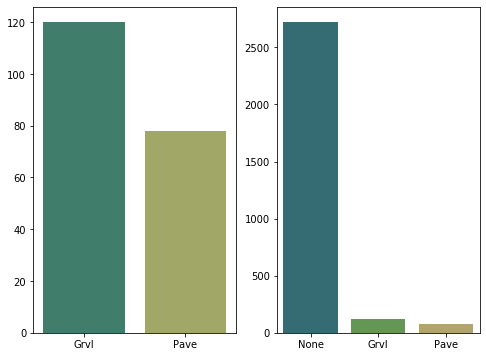

In [10]:
# we are going to assume alley doesnt exist if type isnt specified as many houses may not have it.
fig = plt.figure(figsize = (8, 6))
alley = full['Alley'].value_counts()
fig.add_subplot(1,2,1)
sns.barplot(alley.index, alley.values, palette="gist_earth")

full['Alley'] = full["Alley"].fillna("None")

alley = full['Alley'].value_counts()
fig.add_subplot(1,2,2)
sns.barplot(alley.index, alley.values, palette="gist_earth")

In [11]:
# all of these have 1 or 2 missing value, so we will fill it with the mode.
full['Electrical'] = full['Electrical'].fillna(full['Electrical'].mode()[0])
full['Exterior1st'] = full['Exterior1st'].fillna('VinylSd')
full['Exterior2nd'] = full['Exterior2nd'].fillna('VinylSd')
full['Functional'] = full['Functional'].fillna('Typ')

In [12]:
# multiple missing values, Let us fill fence empty values as None
# fireplace also, same idea. Also it is reasonable that many houses may not have a fence and a fireplace.
full['Fence'] = full['Fence'].fillna('None')
full['FireplaceQu'] = full['FireplaceQu'].fillna('None')

In [13]:
# only 1 missing value, fill with most occuring value.
full['KitchenQual'] = full['KitchenQual'].fillna(full['KitchenQual'].mode()[0])

Int64Index([ 234,  529,  650,  936,  973,  977, 1243, 1278, 1691, 1706, 1882,
            1992, 2004, 2041, 2311, 2325, 2340, 2349, 2368, 2592, 2610, 2657,
            2686, 2862],
           dtype='int64')

Int64Index([ 234,  529,  650,  936,  973,  977, 1243, 1278, 1691, 1706, 1882,
            1992, 2004, 2041, 2311, 2325, 2340, 2349, 2368, 2592, 2657, 2686,
            2862],
           dtype='int64')

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2610,1608,0,0,None,3,1Fam,TA,No,811.0,0.0,BLQ,Unf,0.0,0.0,TA,585.0,N,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,None,None,0,CBlock,1,Typ,444.0,1.0,Fa,Unf,TA,Attchd,1961.0,1608,0,GasA,TA,1Story,1,TA,Lvl,Gtl,27697,Inside,124.0,Reg,0,20,RL,198.0,NaN,NaN,0,11,Mitchel,38,3,4,Y,0,NaN,CompShg,Shed,Abnorml,COD,0,Pave,6,1396.0,AllPub,152,1961,1961,2007


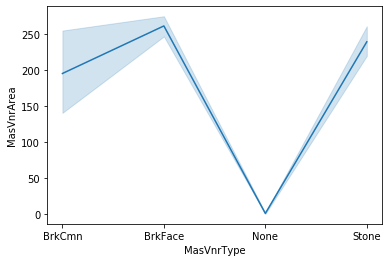

In [14]:
# there are 24 missing in type and only 23 in area, so check the indexes.
# id 2610, is extra missing in type, and area is 198, so using graph we can see, the type has to be BrkFace
full[full.MasVnrType.isnull()].index
full[full.MasVnrArea.isnull()].index
full.iloc[[2610]]
sns.lineplot(x='MasVnrType', y='MasVnrArea', data=full)
full['MasVnrType'].values[2610] = 'BrkFace'

In [15]:
full.iloc[[2610]]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2610,1608,0,0,None,3,1Fam,TA,No,811.0,0.0,BLQ,Unf,0.0,0.0,TA,585.0,N,Norm,Norm,SBrkr,0,TA,TA,Plywood,Plywood,None,None,0,CBlock,1,Typ,444.0,1.0,Fa,Unf,TA,Attchd,1961.0,1608,0,GasA,TA,1Story,1,TA,Lvl,Gtl,27697,Inside,124.0,Reg,0,20,RL,198.0,BrkFace,NaN,0,11,Mitchel,38,3,4,Y,0,NaN,CompShg,Shed,Abnorml,COD,0,Pave,6,1396.0,AllPub,152,1961,1961,2007


In [16]:
# now we can fill all empty values with None and 0. and mode for MSZoning
full['MasVnrType'] = full['MasVnrType'].fillna('None')
full['MasVnrArea'] = full['MasVnrArea'].fillna(0)
full['MSZoning'] = full['MSZoning'].fillna('RL')

In [17]:
# very few houses have Pool, so filling others with None. similarly for Misc features also.
full['MiscFeature'] = full['MiscFeature'].fillna('None')
full['PoolQC'] = full['PoolQC'].fillna('None')

In [18]:
# mode occurs 2500+ times. so filling with WD. Utilities with mode as only 2 missing.
full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0])
full['Utilities'] = full['Utilities'].fillna('AllPub')

In [19]:
full['LotFrontage'] = full.groupby('LotShape')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [20]:
# these 5 columns have 82, 82, 81, 80, 79 missing values. So let us check indexes. Only 79 are having missing values
# for all 5 columns. So remaining columns, lets ampute with mode.
exp = full[full.BsmtExposure.isnull()].index
cond = full[full.BsmtCond.isnull()].index
qual = full[full.BsmtQual.isnull()].index
fin2 = full[full.BsmtFinType2.isnull()].index
fin1 = full[full.BsmtFinType1.isnull()].index
x = exp & cond & qual & fin2 & fin1
np.setdiff1d(exp, x)
np.setdiff1d(cond, x)
np.setdiff1d(qual, x)
np.setdiff1d(fin2, x)
np.setdiff1d(fin1, x)

arr = [332, 948, 1487, 2040, 2185, 2217, 2218, 2348, 2524]
for a in arr:
    full.iloc[[a]]

array([ 948, 1487, 2348])

array([2040, 2185, 2524])

array([2217, 2218])

array([332])

array([], dtype=int64)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
332,1629,0,0,None,3,1Fam,TA,No,1124.0,479.0,GLQ,NaN,1.0,0.0,Gd,1603.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,880.0,3.0,TA,RFn,TA,Attchd,2003.0,1629,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,10655,Inside,85.0,IR1,0,20,RL,296.0,BrkFace,None,0,10,NridgHt,0,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,7,3206.0,AllPub,0,2003,2004,2009


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
948,936,840,0,None,3,1Fam,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,936.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,474.0,2.0,TA,RFn,TA,Attchd,2002.0,1776,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14006,Inside,65.0,IR1,0,60,RL,144.0,BrkFace,None,0,2,CollgCr,96,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,7,936.0,AllPub,144,2002,2002,2006


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1487,1595,0,0,None,2,1Fam,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1595.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,Gd,1,PConc,2,Typ,880.0,3.0,TA,RFn,TA,Attchd,2005.0,1595,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,8987,Inside,73.0,Reg,0,20,RL,226.0,BrkFace,None,0,5,Somerst,0,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1595.0,AllPub,144,2005,2006,2010


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2040,1671,0,0,None,3,1Fam,NaN,Mn,1044.0,382.0,GLQ,Rec,1.0,0.0,Gd,0.0,Y,Norm,Norm,SBrkr,0,Ex,Ex,VinylSd,VinylSd,GdWo,Gd,1,CBlock,3,Typ,550.0,2.0,TA,RFn,TA,Attchd,1976.0,1671,0,GasA,Ex,1Story,1,Ex,Lvl,Gtl,16280,Inside,103.0,Reg,0,20,RL,0.0,None,None,0,5,Veenker,90,9,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,1426.0,AllPub,280,1976,2007,2008


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2185,1127,0,0,None,3,1Fam,NaN,No,1033.0,0.0,BLQ,Unf,0.0,1.0,TA,94.0,Y,Norm,Norm,SBrkr,138,TA,TA,HdBoard,Plywood,None,Po,1,CBlock,1,Typ,480.0,2.0,TA,Unf,TA,Detchd,1991.0,1127,1,GasA,TA,1Story,1,TA,Lvl,Gtl,6500,Inside,65.0,Reg,0,20,RL,84.0,BrkFace,None,0,5,Edwards,0,6,6,Y,0,None,CompShg,Hip,Normal,WD,0,Pave,6,1127.0,AllPub,0,1976,1976,2008


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2217,825,536,0,None,2,1Fam,Fa,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,173.0,N,Feedr,Norm,SBrkr,0,TA,TA,Wd Sdng,Wd Sdng,None,None,0,Stone,1,Typ,185.0,1.0,TA,Unf,Fa,Detchd,1895.0,1361,0,GasA,Ex,2Story,1,TA,Lvl,Gtl,5280,Corner,60.0,Reg,0,70,C (all),0.0,None,None,0,7,IDOTRR,123,7,4,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,173.0,AllPub,0,1895,1950,2008


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2218,671,378,0,None,2,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,NaN,356.0,N,Feedr,Norm,FuseA,0,TA,TA,Plywood,Plywood,None,None,0,PConc,1,Typ,195.0,1.0,Fa,Unf,Po,Detchd,1910.0,1049,0,GasA,TA,1.5Fin,1,TA,Lvl,Gtl,5150,Corner,52.0,Reg,0,50,C (all),0.0,None,None,0,5,IDOTRR,0,7,4,N,0,None,CompShg,Gable,Normal,WD,0,Pave,5,356.0,AllPub,0,1910,2000,2008


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2348,725,863,0,None,3,1Fam,TA,NaN,0.0,0.0,Unf,Unf,0.0,0.0,Gd,725.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,CBlock,3,Typ,561.0,2.0,TA,Unf,TA,Attchd,2007.0,1588,0,GasA,Ex,2Story,1,Gd,Lvl,Gtl,10411,Corner,81.0,Reg,0,60,FV,0.0,None,None,0,7,Somerst,0,5,5,Y,0,None,CompShg,Gable,Partial,New,0,Pave,8,725.0,AllPub,0,2007,2007,2007


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2524,1009,0,0,None,3,1Fam,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,VinylSd,MnPrv,Fa,1,CBlock,2,Typ,576.0,2.0,TA,Unf,TA,Detchd,1977.0,1009,0,GasA,TA,SLvl,1,TA,Lvl,Gtl,9720,Inside,72.0,Reg,0,80,RL,51.0,BrkFace,None,0,6,CollgCr,0,7,5,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,6,995.0,AllPub,0,1977,1977,2007


In [21]:
full['BsmtFinType2'].values[332] = full['BsmtFinType2'].mode()[0]

for i in [2217, 2218]:
    full['BsmtQual'].values[i] = full['BsmtQual'].mode()[0]

for i in [2040, 2185, 2524]:
    full['BsmtCond'].values[i] = full['BsmtCond'].mode()[0]
    
for i in [948, 1487, 2348]:
    full['BsmtExposure'].values[i] = full['BsmtExposure'].mode()[0]

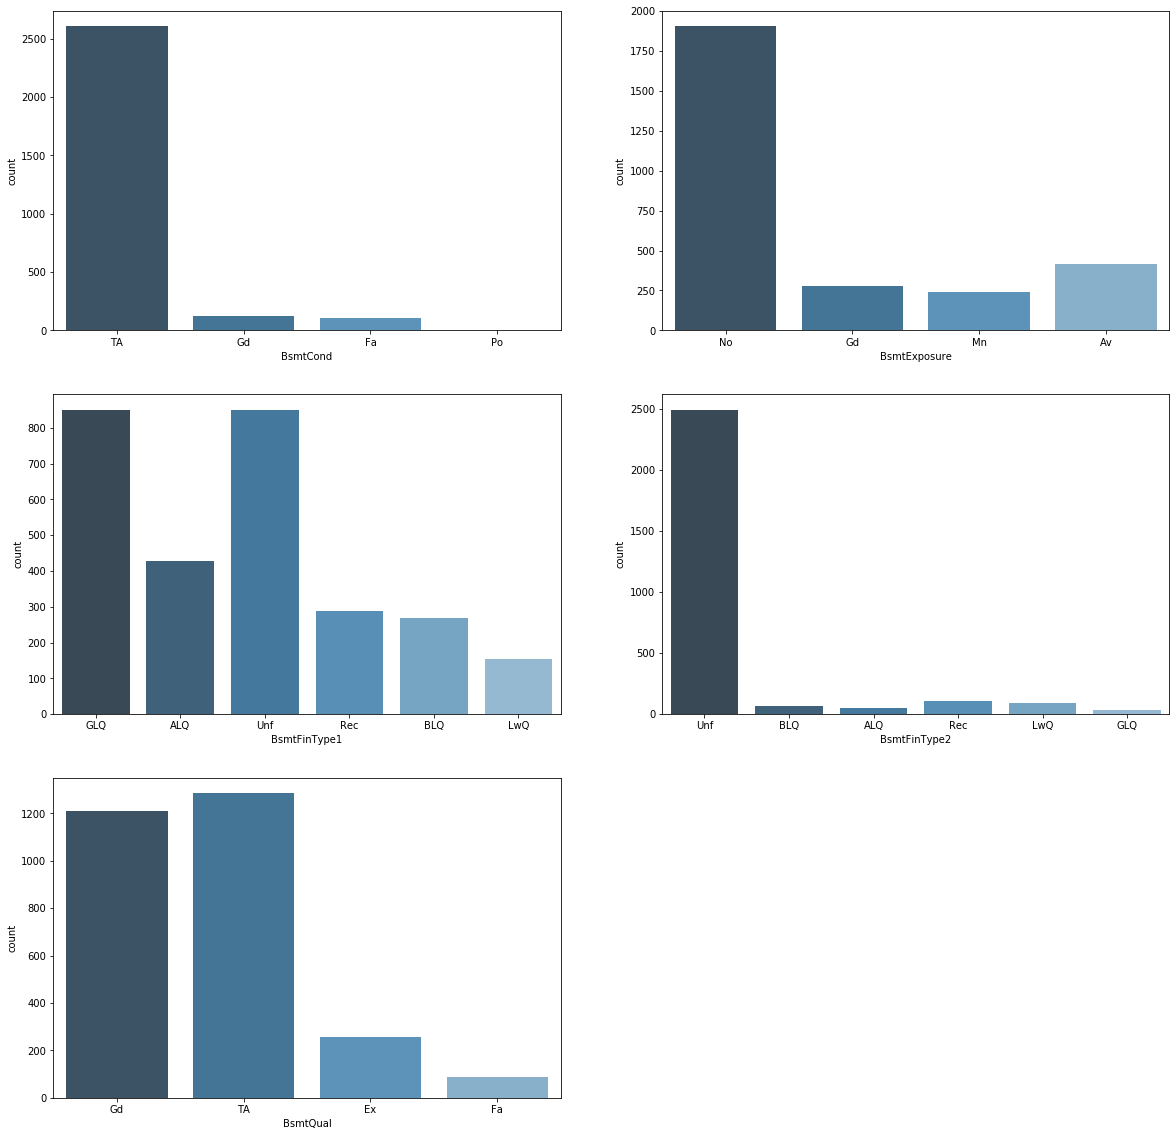

In [22]:
# 79 rows with all 5 missing values, so let us assume they dont have a basement.
fig = plt.figure(figsize = (20, 20))
columns = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual']
count = 1
for col in columns:
    ax1 = fig.add_subplot(3,2,count) 
    sns.countplot(x = col, data = full, ax = ax1, palette="Blues_d")
    count+=1
    
for col in columns:
    full[col] = full[col].fillna('None')

In [23]:
# there are only 2 rows, with these values missing. 
full[full.BsmtFinSF1.isnull()].index
full[full.BsmtFinSF2.isnull()].index
full[full.BsmtFullBath.isnull()].index
full[full.BsmtHalfBath.isnull()].index
full[full.BsmtUnfSF.isnull()].index
full[full.TotalBsmtSF.isnull()].index

Int64Index([2120], dtype='int64')

Int64Index([2120], dtype='int64')

Int64Index([2120, 2188], dtype='int64')

Int64Index([2120, 2188], dtype='int64')

Int64Index([2120], dtype='int64')

Int64Index([2120], dtype='int64')

In [24]:
# all of these have 1 or 2 missing values, let us fill it with the min value, of 0.
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF'):
    full[col] = full[col].fillna(0)

In [25]:
# there are 159, 159, 159 and 157 missing values. 157 is common, and 2 arent.
cond = full[full.GarageCond.isnull()].index
fin = full[full.GarageFinish.isnull()].index
qual = full[full.GarageQual.isnull()].index
blt = full[full.GarageYrBlt.isnull()].index
typ = full[full.GarageType.isnull()].index

y = cond & fin & qual & typ & blt

np.setdiff1d(cond, y)
np.setdiff1d(fin, y)
np.setdiff1d(qual, y)
np.setdiff1d(blt, y)
np.setdiff1d(typ, y)

full.iloc[[2126]]
full.iloc[[2576]]

array([2126, 2576])

array([2126, 2576])

array([2126, 2576])

array([2126, 2576])

array([], dtype=int64)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2126,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.0,0.0,Rec,Unf,0.0,0.0,TA,1046.0,Y,Norm,Norm,SBrkr,180,TA,TA,Wd Sdng,Wd Sdng,MnPrv,None,0,PConc,2,Typ,360.0,1.0,NaN,NaN,NaN,Detchd,NaN,1984,0,GasA,Gd,2.5Unf,1,TA,Lvl,Gtl,8094,Inside,57.0,Reg,0,60,RM,0.0,None,Shed,1000,9,OldTown,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,1242.0,AllPub,64,1910,1983,2008


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2576,942,886,0,None,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,None,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,None,0,3,IDOTRR,0,6,5,Y,0,None,CompShg,Gable,Alloca,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


In [26]:
# we have only 1 row where cars and area is missing, so actually, 2576 has no garage, but one column was misleading us
#So let us make that type as none
full['GarageType'].values[2576] = 'None'
full['GarageCond'].values[2126] = full['GarageCond'].mode()[0]
full['GarageFinish'].values[2126] = full['GarageFinish'].mode()[0]
full['GarageQual'].values[2126] = full['GarageQual'].mode()[0]

full['GarageYrBlt'] = full['GarageYrBlt'].fillna(full['YearBuilt'])

In [27]:
full.iloc[[2126]]
full.iloc[[2576]]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2126,1242,742,0,Grvl,5,2fmCon,TA,Mn,196.0,0.0,Rec,Unf,0.0,0.0,TA,1046.0,Y,Norm,Norm,SBrkr,180,TA,TA,Wd Sdng,Wd Sdng,MnPrv,None,0,PConc,2,Typ,360.0,1.0,TA,Unf,TA,Detchd,1910.0,1984,0,GasA,Gd,2.5Unf,1,TA,Lvl,Gtl,8094,Inside,57.0,Reg,0,60,RM,0.0,None,Shed,1000,9,OldTown,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,8,1242.0,AllPub,64,1910,1983,2008


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
2576,942,886,0,None,3,1Fam,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,Y,Norm,Norm,SBrkr,212,TA,TA,Wd Sdng,Plywood,MnPrv,None,0,BrkTil,2,Typ,NaN,NaN,NaN,NaN,NaN,None,1923.0,1828,0,GasA,Ex,2Story,1,Gd,Lvl,Gtl,9060,Inside,50.0,Reg,0,70,RM,0.0,None,None,0,3,IDOTRR,0,6,5,Y,0,None,CompShg,Gable,Alloca,WD,0,Pave,6,859.0,AllPub,174,1923,1999,2007


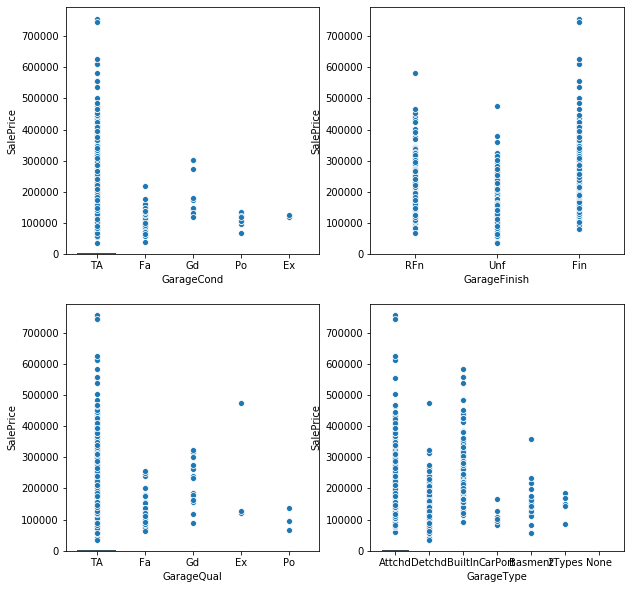

In [28]:
fig = plt.figure(figsize = (10, 10))
columns = ['GarageCond', 'GarageFinish', 'GarageQual', 'GarageType']
count = 1
for col in columns:
    ax1 = fig.add_subplot(2,2,count) 
    sns.countplot(x = col, data = full, ax = ax1, palette="Blues_d")
    sns.scatterplot(x=col, y='SalePrice', data=train)
    count+=1

In [29]:
# fill remaining values with none. and 0 for cars and area
for col in ('GarageCond', 'GarageFinish', 'GarageQual', 'GarageType'):
    full[col] = full[col].fillna('None')

for col in ('GarageArea', 'GarageCars'):
    full[col] = full[col].fillna(0)

In [30]:
# let us check if all null values are gone. Yaaaayy !!
full.isnull().sum()[full.isnull().sum() > 0].sort_values(ascending= False)

Series([], dtype: int64)

In [31]:
###### done imputing missing values ########
###### dropping columns unnecessary and adding new columns #####

In [32]:
full.describe(include="all")

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919,2919.000000,2919,2919,2919,2919.000000,2919.000000,2919,2919,2919.000000,2919.000000,2919,2919.000000,2919,2919,2919,2919,2919.000000,2919,2919,2919,2919,2919,2919,2919.000000,2919,2919.000000,2919,2919.000000,2919.000000,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919,2919,2919,2919.000000,2919,2919,2919,2919.000000,2919,2919.000000,2919,2919.000000,2919.000000,2919,2919.000000,2919,2919,2919.000000,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919,2919.000000,2919,2919,2919,2919,2919,2919.000000,2919,2919.000000,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919.000000
unique,NaN,NaN,NaN,3,NaN,5,5,5,NaN,NaN,7,7,NaN,NaN,5,NaN,2,9,8,5,NaN,5,4,15,16,5,6,NaN,6,NaN,7,NaN,NaN,6,4,6,7,NaN,NaN,NaN,6,5,8,NaN,4,4,3,NaN,5,NaN,4,NaN,NaN,5,NaN,4,5,NaN,NaN,25,NaN,NaN,NaN,3,NaN,4,8,6,6,9,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,None,NaN,1Fam,TA,No,NaN,NaN,Unf,Unf,NaN,NaN,TA,NaN,Y,Norm,Norm,SBrkr,NaN,TA,TA,VinylSd,VinylSd,None,None,NaN,PConc,NaN,Typ,NaN,NaN,TA,Unf,TA,Attchd,NaN,NaN,NaN,GasA,Ex,1Story,NaN,TA,Lvl,Gtl,NaN,Inside,NaN,Reg,NaN,NaN,RL,NaN,None,None,NaN,NaN,NAmes,NaN,NaN,NaN,Y,NaN,None,CompShg,Gable,Normal,WD,NaN,Pave,NaN,NaN,AllPub,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2721,NaN,2425,2609,1907,NaN,NaN,851,2494,NaN,NaN,1285,NaN,2723,2511,2889,2672,NaN,2538,1798,1026,1015,2348,1420,NaN,1308,NaN,2719,NaN,NaN,2655,1231,2605,1723,NaN,NaN,NaN,2874,1493,1471,NaN,1493,2622,2778,NaN,2133,NaN,1859,NaN,NaN,2269,NaN,1765,2814,NaN,NaN,443,NaN,NaN,NaN,2641,NaN,2909,2876,2310,2402,2526,NaN,2907,NaN,NaN,2918,NaN,NaN,NaN,NaN
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,NaN,NaN,441.272011,49.565262,NaN,NaN,0.429599,0.061322,NaN,560.579993,NaN,NaN,NaN,NaN,23.098321,NaN,NaN,NaN,NaN,NaN,NaN,0.597122,NaN,1.568003,NaN,472.712573,1.766016,NaN,NaN,NaN,NaN,1976.253854,1500.759849,0.380267,NaN,NaN,NaN,1.044536,NaN,NaN,NaN,10168.114080,NaN,69.905629,NaN,4.694416,57.137718,NaN,101.396026,NaN,NaN,50.825968,6.213087,NaN,47.486811,5.564577,6.089072,NaN,2.251799,NaN,NaN,NaN,NaN,NaN,16.062350,NaN,6.451524,1051.417266,NaN,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,NaN,NaN,455.606014,169.179104,NaN,NaN,0.524676,0.245608,NaN,439.590889,NaN,NaN,NaN,NaN,64.244246,NaN,NaN,NaN,NaN,NaN,NaN,0.646129,NaN,0.552969,NaN,215.535686,0.762196,NaN,NaN,NaN,NaN,27.040351,506.051045,0.502872,NaN,NaN,NaN,0.214462,NaN,NaN,NaN,7886.996359,NaN,21.493306,NaN,46.396825,42.517628,NaN,178.854579,NaN,NaN,567.402211,2.714762,NaN,67.575493,1.113131,1.409947,NaN,35.663946,NaN,NaN,NaN,NaN,NaN,56.184365,NaN,1.569379,441.120498,NaN,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1872.000000,334.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1300.000000,NaN,21.000000,NaN,0.000000,20.000000,NaN,0.000000,NaN,NaN,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,0.000000

In [33]:
# we are going to drop these columns as over 95% values are same.
columns = ['Condition2', 'Heating', 'MiscFeature', 'PoolQC', 'RoofMatl', 'Street', 'Utilities']
for col in columns:
    full.drop(col, axis=1, inplace=True)

In [34]:
# introduce a new column, with total area
full['TotalSF'] = full['TotalBsmtSF'] + full['1stFlrSF'] + full['2ndFlrSF']
full['TotalPorchSF'] = full['3SsnPorch'] + full['EnclosedPorch'] + full['OpenPorchSF'] + full['ScreenPorch'] + full['WoodDeckSF']
full['TotalBath'] = full['BsmtFullBath'] + 0.5*full['BsmtHalfBath'] + full['FullBath'] + 0.5*full['HalfBath']
full.describe(include="all")

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,TotalPorchSF,TotalBath
count,2919.000000,2919.000000,2919.000000,2919,2919.000000,2919,2919,2919,2919.000000,2919.000000,2919,2919,2919.000000,2919.000000,2919,2919.000000,2919,2919,2919,2919.000000,2919,2919,2919,2919,2919,2919,2919.000000,2919,2919.000000,2919,2919.000000,2919.000000,2919,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919,2919,2919.000000,2919,2919,2919,2919.000000,2919,2919.000000,2919,2919.000000,2919.000000,2919,2919.000000,2919,2919.000000,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919,2919.000000,2919,2919,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.00000,2919.000000,2919.000000
unique,NaN,NaN,NaN,3,NaN,5,5,5,NaN,NaN,7,7,NaN,NaN,5,NaN,2,9,5,NaN,5,4,15,16,5,6,NaN,6,NaN,7,NaN,NaN,6,4,6,7,NaN,NaN,NaN,5,8,NaN,4,4,3,NaN,5,NaN,4,NaN,NaN,5,NaN,4,NaN,NaN,25,NaN,NaN,NaN,3,NaN,6,6,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,None,NaN,1Fam,TA,No,NaN,NaN,Unf,Unf,NaN,NaN,TA,NaN,Y,Norm,SBrkr,NaN,TA,TA,VinylSd,VinylSd,None,None,NaN,PConc,NaN,Typ,NaN,NaN,TA,Unf,TA,Attchd,NaN,NaN,NaN,Ex,1Story,NaN,TA,Lvl,Gtl,NaN,Inside,NaN,Reg,NaN,NaN,RL,NaN,None,NaN,NaN,NAmes,NaN,NaN,NaN,Y,NaN,Gable,Normal,WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2721,NaN,2425,2609,1907,NaN,NaN,851,2494,NaN,NaN,1285,NaN,2723,2511,2672,NaN,2538,1798,1026,1015,2348,1420,NaN,1308,NaN,2719,NaN,NaN,2655,1231,2605,1723,NaN,NaN,NaN,1493,1471,NaN,1493,2622,2778,NaN,2133,NaN,1859,NaN,NaN,2269,NaN,1765,NaN,NaN,443,NaN,NaN,NaN,2641,NaN,2310,2402,2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,NaN,NaN,441.272011,49.565262,NaN,NaN,0.429599,0.061322,NaN,560.579993,NaN,NaN,NaN,23.098321,NaN,NaN,NaN,NaN,NaN,NaN,0.597122,NaN,1.568003,NaN,472.712573,1.766016,NaN,NaN,NaN,NaN,1976.253854,1500.759849,0.380267,NaN,NaN,1.044536,NaN,NaN,NaN,10168.114080,NaN,69.905629,NaN,4.694416,57.137718,NaN,101.396026,NaN,50.825968,6.213087,NaN,47.486811,5.564577,6.089072,NaN,2.251799,NaN,NaN,NaN,16.062350,6.451524,1051.417266,93.709832,1971.312778,1984.264474,2007.792737,2547.48270,182.959575,2.218397
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,NaN,NaN,455.606014,169.179104,NaN,NaN,0.524676,0.245608,NaN,439.590889,NaN,NaN,NaN,64.244246,NaN,NaN,NaN,NaN,NaN,NaN,0.646129,NaN,0.552969,NaN,215.535686,0.762196,NaN,NaN,NaN,NaN,27.040351,506.051045,0.502872,NaN,NaN,0.214462,NaN,NaN,NaN,7886.996359,NaN,21.493306,NaN,46.396825,42.517628,NaN,178.854579,NaN,567.402211,2.714762,NaN,67.575493,1.113131,1.409947,NaN,35.663946,NaN,NaN,NaN,56.184365,1.569379,441.120498,126.526589,30.291442,20.894344,1.314964,805.12084,160.021404,0.808840
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1872.000000,334.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,1300.000000,NaN,21.000000,NaN,0.000000,20.000000,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000,334.00000,0.000000,1.000000
25%,876.000000,0.000000,0.00000

<Figure size 1152x720 with 0 Axes>

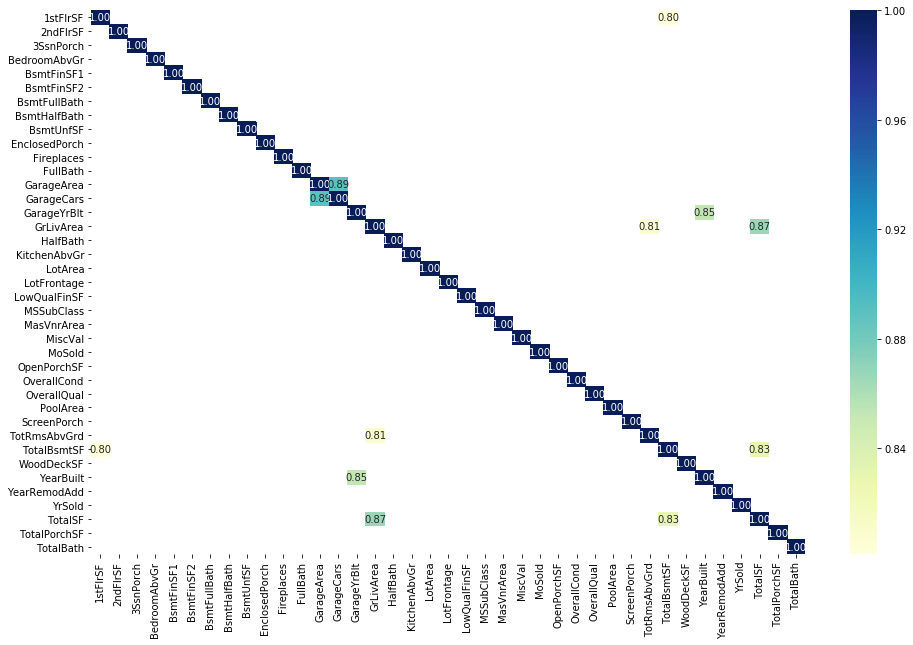

In [35]:
plt.figure(figsize=(16, 10))
sns.heatmap(full.corr()[full.corr() > 0.8], cmap="YlGnBu", annot=True, fmt='.2f')

In [36]:
# let us choose only one of two columns, that are highly correlated. For that we need to see their relation to SalePrice.
# Rmbr to do it towards end.
#1. GarageCars, GarageArea
# GrLivArea, TotalSF
#2. GarageYrBuilt, YearBuilt
# TotalBsmtSF, TotalSF
#3. TotalBsmtSF, 1srFlrSF
#4. GrLivArea, TotRmsAbvGrd

In [37]:
# There are some parameters like, mosold, yrsold which are numerical but need to be categorical.
full['YrSold'] = full['YrSold'].astype(str)
full['MoSold'] = full['MoSold'].astype(str)
full['MSSubClass'] = full['MSSubClass'].astype(str)
full['OverallCond'] = full['OverallCond'].astype(str)

In [38]:
######### split 1 after first join #########
# to see heatmap with saleprice and drop highly correlated columns in full
# let us split, to corr of parameters with SalePrice, and then drop columns.
train = full[:ntrain]
test = full[ntrain:]
train['SalePrice'] = y_train
train.shape
test.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(1460, 76)

(1459, 75)

<Figure size 1872x1440 with 0 Axes>

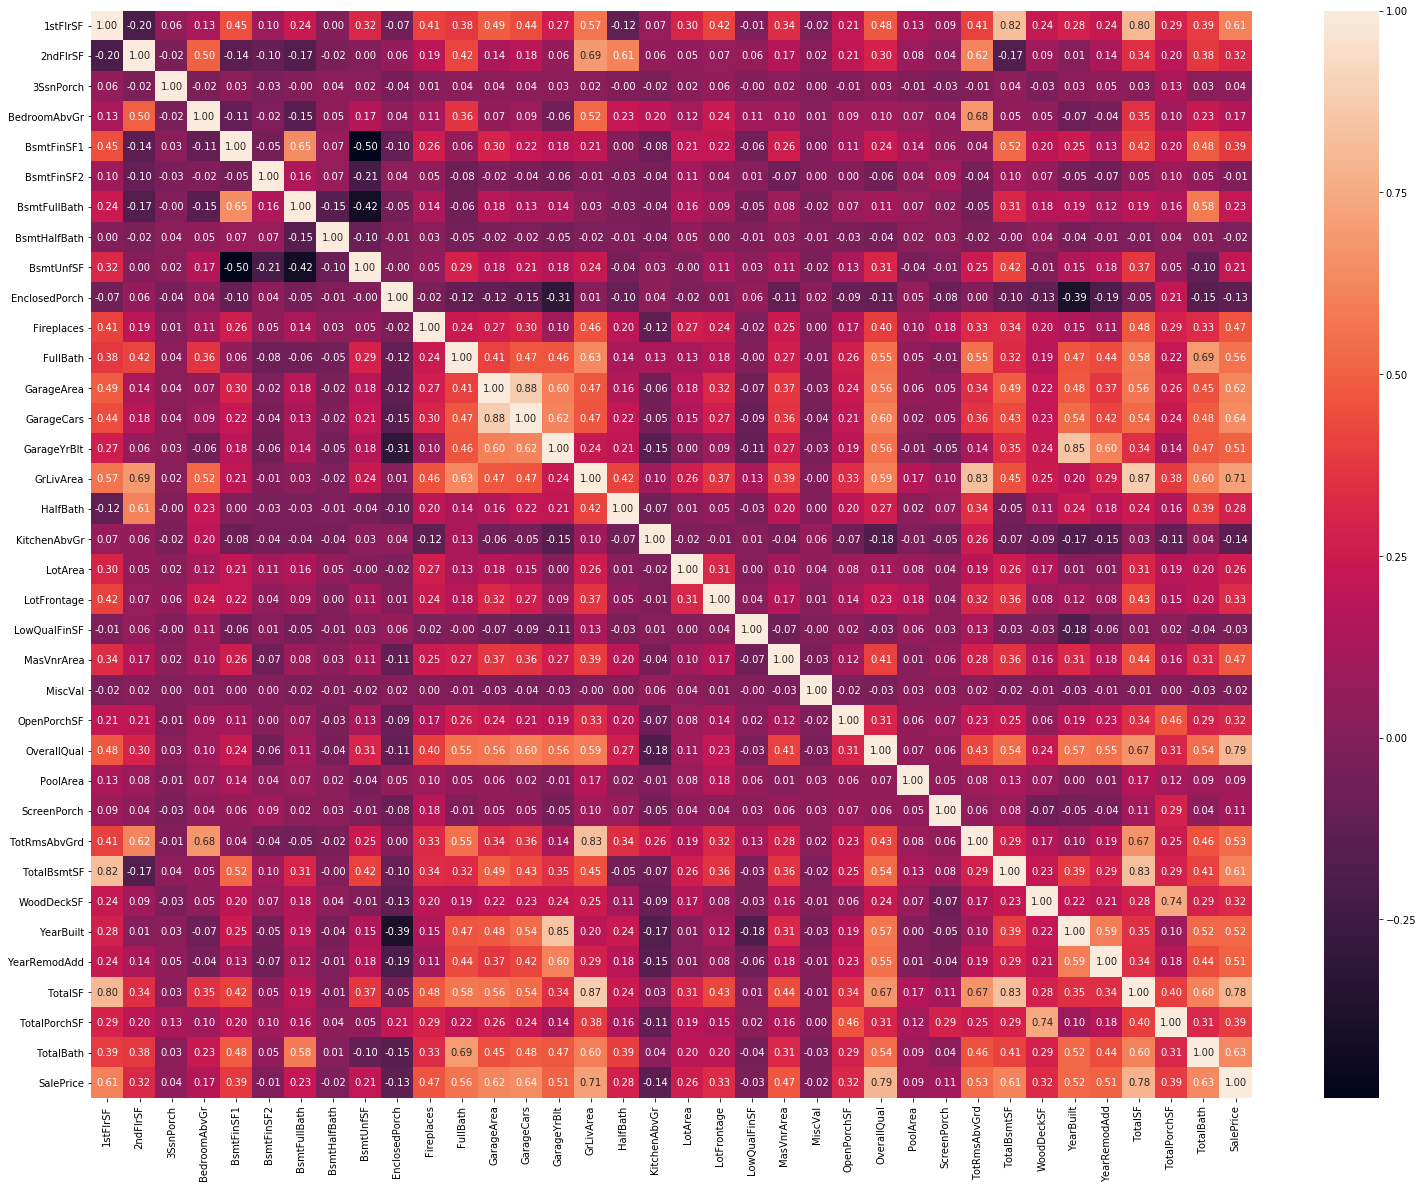

In [40]:
#saleprice correlation matrix for the 10 highest features.
plt.figure(figsize=(26, 20))
# cols = train.corr().nlargest(20, 'SalePrice')['SalePrice'].index
# corr = train[cols].corr()
# sns.set(font_scale=1)
sns.heatmap(train.corr(), annot=True, fmt='.2f')

In [41]:
columns = ['GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt']
for col in columns:
    full.drop(col, axis=1, inplace=True)

In [42]:
######## split 2 after join, after dropping columns ######## 
# to remove outliers.
train = full[:ntrain]
test = full[ntrain:]
train['SalePrice'] = y_train
train.shape
test.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


(1460, 70)

(1459, 69)

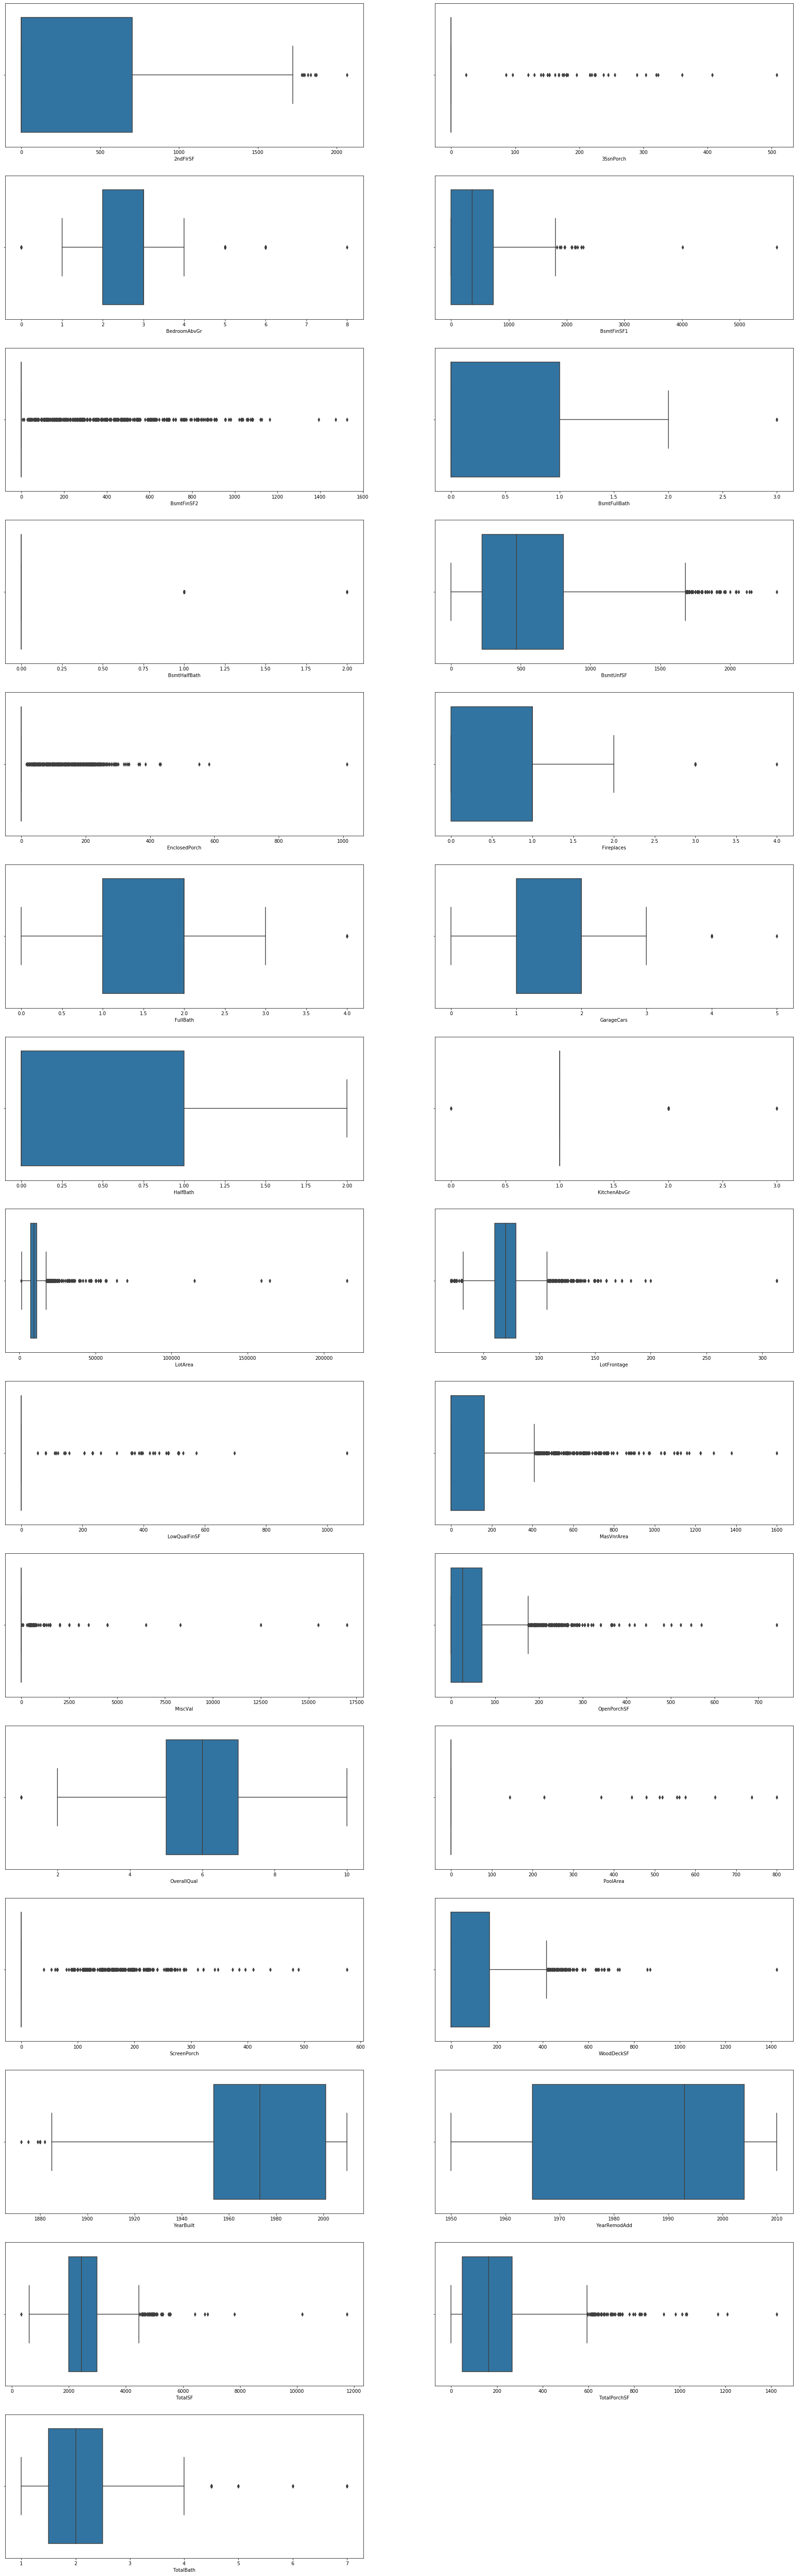

In [43]:
# univariate analysis to see outliers. 
fig = plt.figure(figsize = (30, 120))
count = 1
for col in full.select_dtypes('number').columns:
    ax = fig.add_subplot(18,2,count) 
    sns.boxplot(x=full[col])
    count +=1


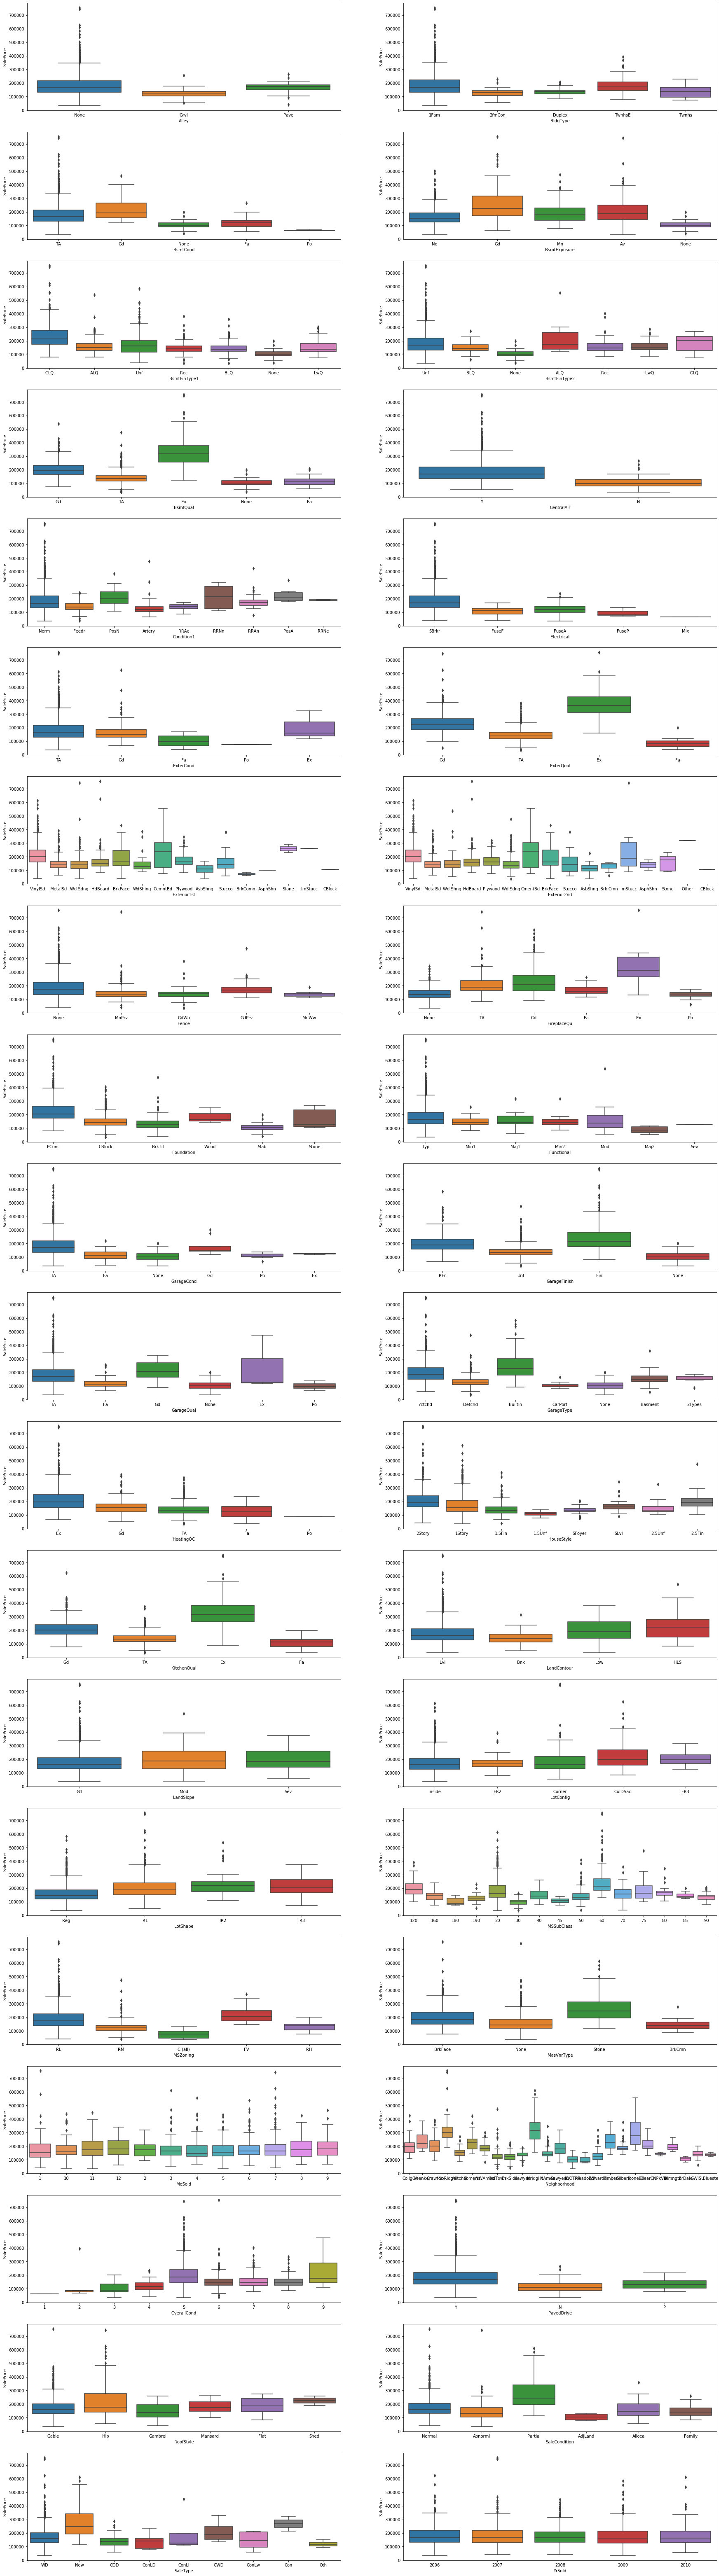

In [44]:
# we are going to remove outliers only in the model we train. Since we need test data as it is to submit, we wont remove any rows from it.
# bivariate analysis of categorical features to see outliers.
fig = plt.figure(figsize = (30, 120))
count = 1
for col in train.select_dtypes('object').columns:
    ax = fig.add_subplot(21,2,count) 
    sns.boxplot(x=col, y='SalePrice', data=train)
    count +=1


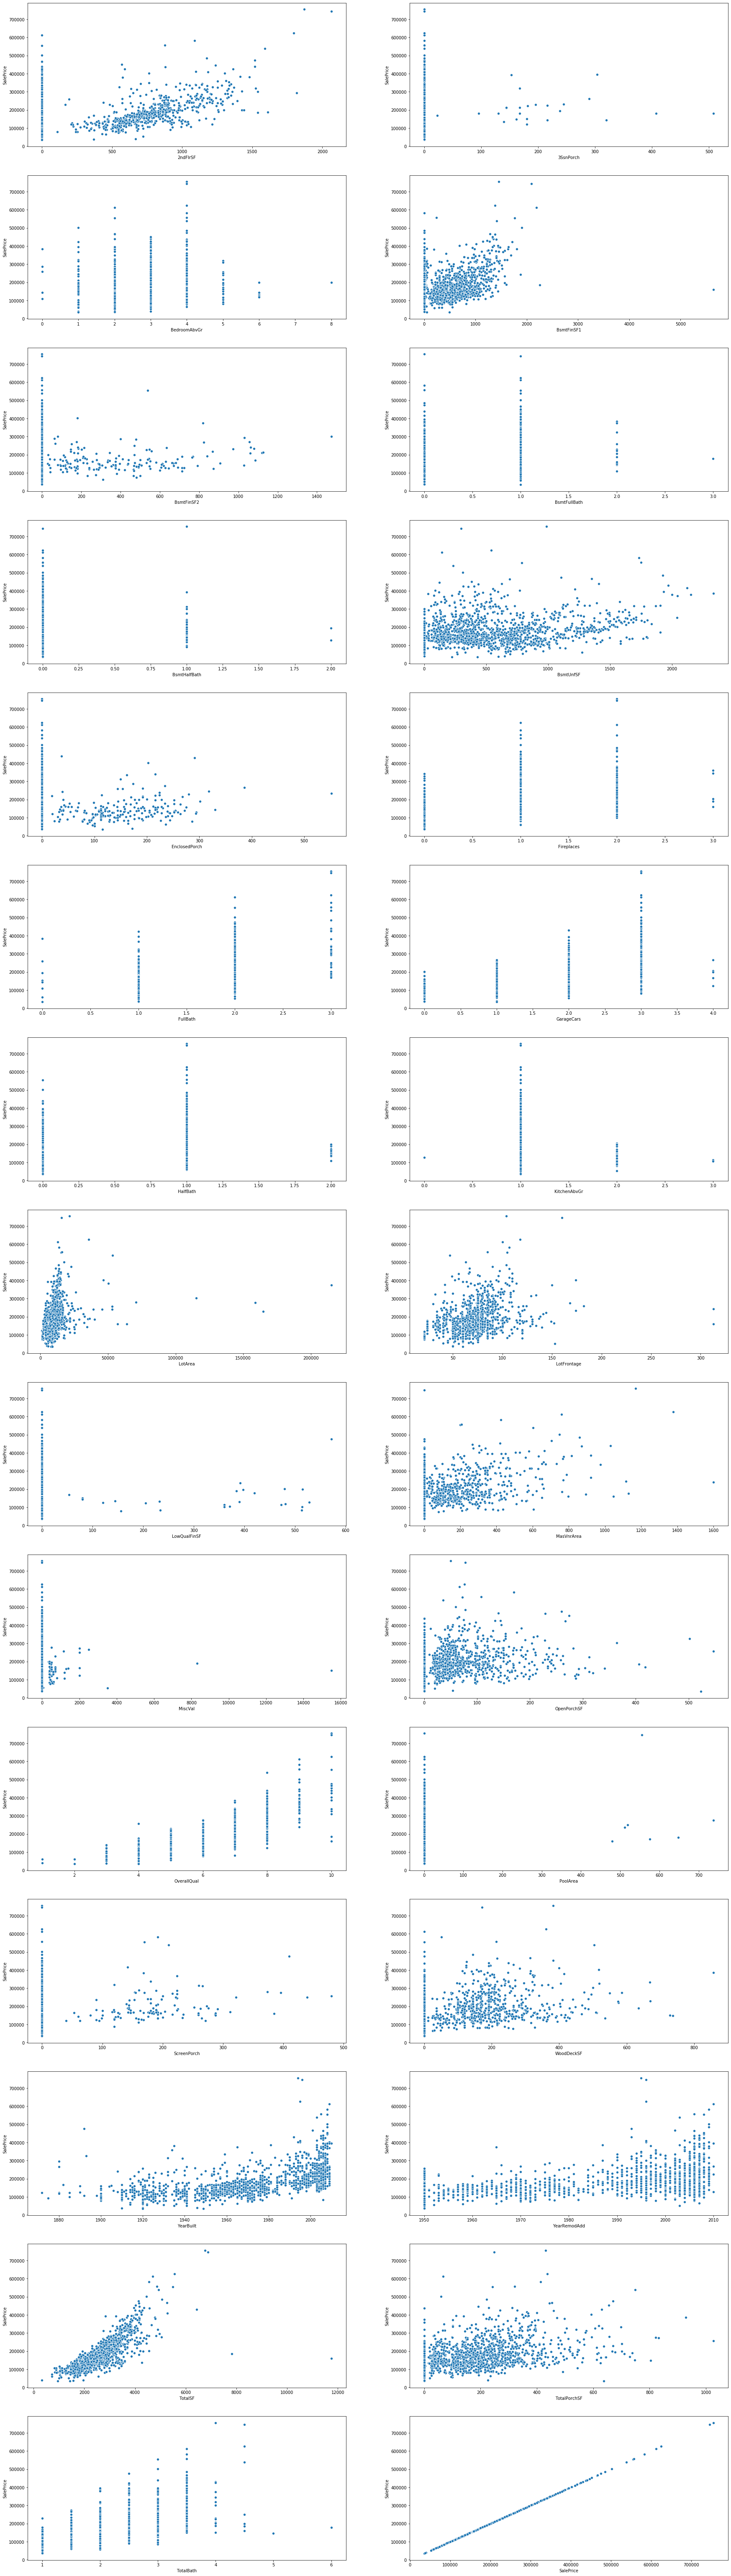

In [45]:
# bivariate analysis of numerical features to see outliers. 
fig = plt.figure(figsize = (30, 120))
count = 1
for col in train.select_dtypes('number').columns:
    ax = fig.add_subplot(16,2,count) 
    sns.scatterplot(x=col, y='SalePrice', data=train)
    count +=1

In [46]:
# based on categorical data no rows to remove.
# based on numerical, 
#1. 1stFlrSF above 4000 but price is low.
#2. BsmtFinSF1 above 5000
#3. BsmtFinSF2 above 1400
#4. BedroomAbvGr above 6 and less than 2500000
#4. GrLivArea above 4500 but p5ice too low.
#5. Misc value above 8000
#6. OpenPorchSF > 500, less than 100000
#6. OverallCond less than 5 and price above 30,000
#7. TotalBsmtSF above 6000
#8. TotalSF above 11500, but price too low.

# 457
train.drop(train[(train['OverallQual']<5) & (train['SalePrice']>200000)].index, inplace=True)

#523, 1298
train.drop(train[(train['TotalSF']>7500) & (train['SalePrice']<300000)].index, inplace=True)

#495
train.drop(train[(train['OpenPorchSF']>500) & (train['SalePrice']<100000)].index, inplace=True)
#train.iloc[[523]]

# 738, 921
train.drop(train[(train['TotalBath']>4.5) & (train['SalePrice']<200000)].index, inplace=True)
train.reset_index(drop=True, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<Figure size 1152x432 with 0 Axes>

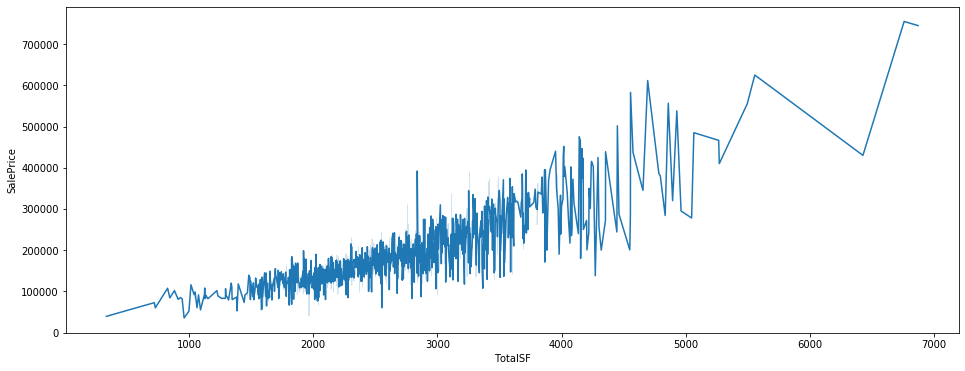

In [47]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='TotalSF', y='SalePrice', data=train)

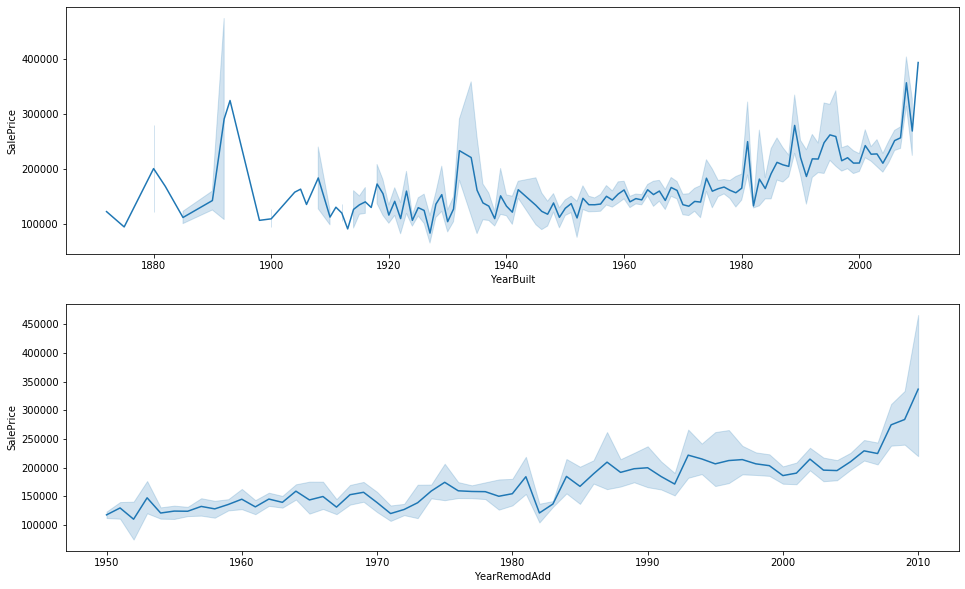

In [48]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(2,1,1)
sns.lineplot(x='YearBuilt', y='SalePrice', data=train, ax=ax)

ax = fig.add_subplot(2,1,2) 
sns.lineplot(x='YearRemodAdd', y='SalePrice', data=train, ax=ax)

<Figure size 1152x720 with 0 Axes>

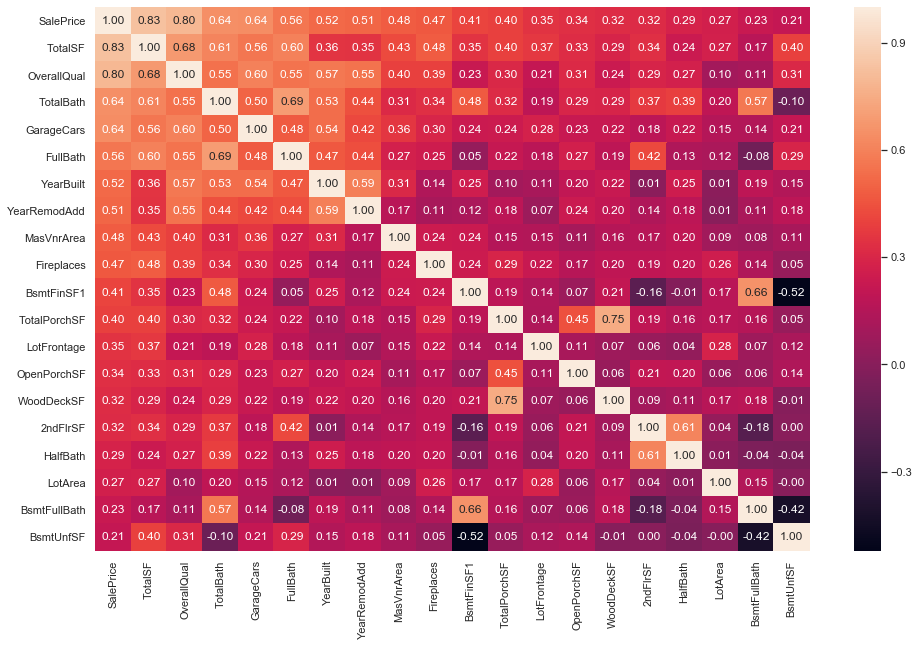

In [49]:
#saleprice correlation matrix for the 10 highest features. after removing outliers, before encoding.
plt.figure(figsize=(16, 10))
cols = train.corr().nlargest(20, 'SalePrice')['SalePrice'].index
corr = train[cols].corr()
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, fmt='.2f')

In [50]:
######## joining for skewness fixing and forming categorical variables#########
train.shape
test.shape
ntrain = train.shape[0]
y_train = train.SalePrice.values

full = pd.concat((train, test)).reset_index(drop=True)
full.drop(['SalePrice'], axis=1, inplace=True)
full.shape

(1454, 70)

(1459, 69)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(2913, 69)

In [51]:
from scipy.stats import skew, boxcox_normmax

numericFeats = full.dtypes[full.dtypes != "object"].index
skewedFeats = full[numericFeats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewedFeats})
skewness
skewness = skewness[abs(skewness).Skew > 0.5]
print("There are {} numerical features with skew > 0.5".format(skewness.shape[0]))

,Skew
MiscVal,21.924619
PoolArea,17.676417
LotArea,13.256176
LowQualFinSF,12.076090
3SsnPorch,11.364106
KitchenAbvGr,4.315501
BsmtFinSF2,4.141222
EnclosedPorch,4.004015
ScreenPorch,3.941914
BsmtHalfBath,3.926798


There are 23 numerical features with skew > 0.5


In [52]:
# from scipy.special import boxcox1p
for feat in skewness.index:
#     full[feat] = boxcox1p(full[feat], boxcox_normmax(full[feat] + 1))
    full[feat] = np.log1p(full[feat])
    
skewedFeats = full[numericFeats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
pd.DataFrame({'Skew' :skewedFeats})

,Skew
PoolArea,15.612428
3SsnPorch,8.815834
LowQualFinSF,8.548533
MiscVal,5.208044
BsmtHalfBath,3.770098
KitchenAbvGr,3.526466
ScreenPorch,2.941897
BsmtFinSF2,2.458810
EnclosedPorch,1.961438
HalfBath,0.580144


In [53]:
full = pd.get_dummies(full).reset_index(drop=True)

In [55]:
train = full[:ntrain]
test = full[ntrain:]
trainCopy = train
train['SalePrice'] = y_train

train.shape
test.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(1454, 303)

(1459, 302)

<Figure size 1152x432 with 0 Axes>

Skewness: 1.888331
Kurtosis: 6.539946
Skewness: 0.158272
Kurtosis: 0.715440


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


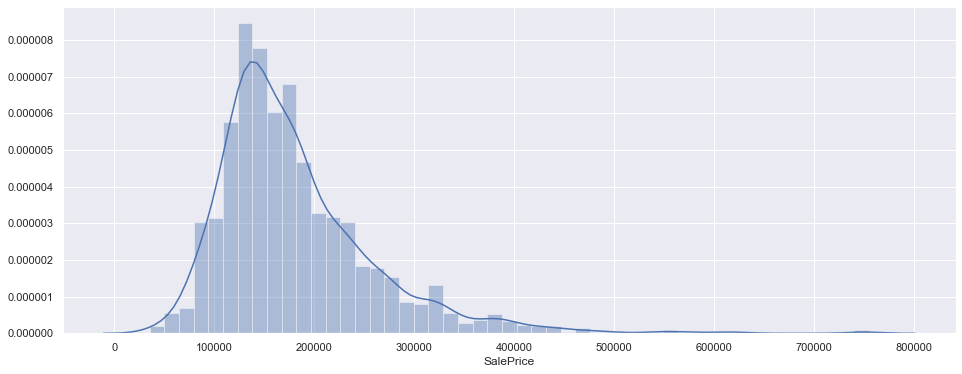

In [57]:
plt.figure(figsize=(16, 6))
sns.distplot(train['SalePrice'], kde=True);

# linear models work better without skewness.. so we will address this before building the model.
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

train["SalePrice"] = np.log1p(train["SalePrice"])

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

In [58]:
train.describe(include="all")

,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageCars,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,OverallQual,PoolArea,ScreenPorch,TotalBath,TotalPorchSF,TotalSF,WoodDeckSF,YearBuilt,YearRemodAdd,Alley_Grvl,Alley_None,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,

<Figure size 1152x720 with 0 Axes>

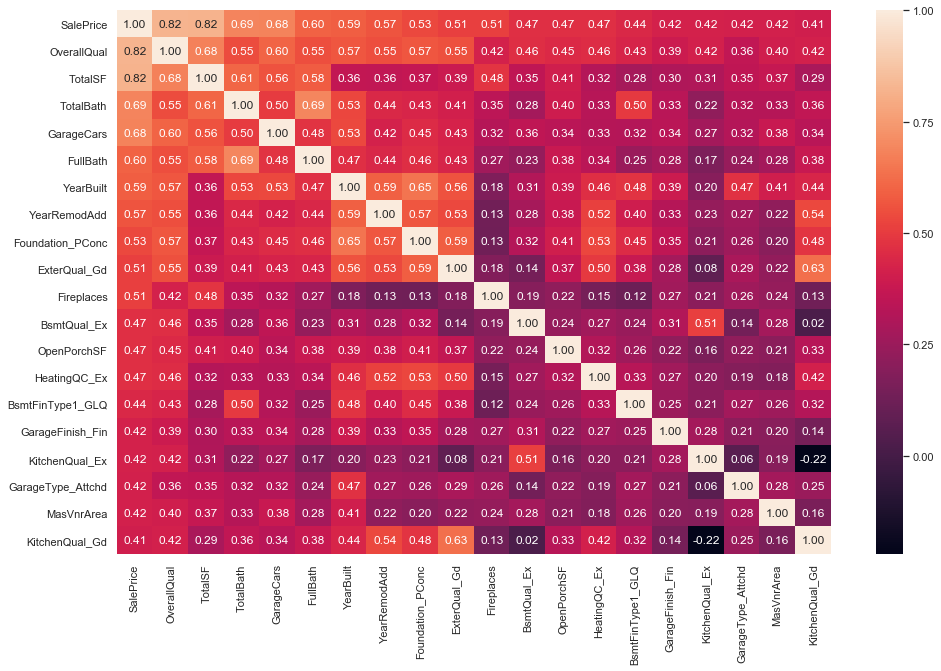

In [59]:
#saleprice correlation matrix for the 10 highest features.
plt.figure(figsize=(16, 10))
cols = train.corr().nlargest(20, 'SalePrice')['SalePrice'].index
corr = train[cols].corr()
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, fmt='.2f')

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [92]:
Y_train = train['SalePrice']
X_train = train.drop('SalePrice',axis=1)

X_train.shape
Y_train.shape

(1454, 302)

(1454,)

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
# features = ['TotalSF', 'OverallQual', 'GarageCars', 'TotalBath', 'BsmtQual_Ex', 'YearBuilt', 'KitchenQual_Ex', 'YearRemodAdd']
# x_train = x_train[features]
# x_test = x_test[features]

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
y_pred = lr.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.9505732625893121

Mean Absolute Error: 0.08235796009118482
Root Mean Squared Error: 0.11828613037061961


In [185]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1500,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
y_pred = rf.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1500,
                      n_jobs=None, oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

0.9496746798638735

Mean Absolute Error: 0.09741833337636313
Root Mean Squared Error: 0.1411834021037818


In [195]:
from xgboost import XGBRegressor
xgb = XGBRegressor(learning_rate=0.01,
                       n_estimators=7000,
                       max_depth=10,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

xgb.fit(x_train, y_train)
xgb.score(x_train, y_train)
y_pred = xgb.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:42:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=0, missing=None, n_estimators=7000,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=42,
             reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
             silent=None, subsample=0.7, verbosity=1)

0.9056105212543839

Mean Absolute Error: 0.09625497232145759
Root Mean Squared Error: 0.1392495983471979


In [196]:
from sklearn.linear_model import LassoCV
las = LassoCV(max_iter=10000, alphas = [5, 1, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005])
las.fit(x_train, y_train)
las.score(x_train, y_train)
y_pred = las.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[5, 1, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005],
        copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=10000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

0.9383703484553495

Mean Absolute Error: 0.07768711929555064
Root Mean Squared Error: 0.10904517037759494


In [197]:
from sklearn.linear_model import RidgeCV
rid = RidgeCV(alphas = [5, 1, 0.1, 0.5, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005])
rid.fit(x_train, y_train)
rid.score(x_train, y_train)
y_pred = rid.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

RidgeCV(alphas=array([5.e+00, 1.e+00, 1.e-01, 5.e-01, 1.e-02, 5.e-02, 1.e-03, 5.e-03,
       1.e-04, 5.e-04]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

0.9443013034967075

Mean Absolute Error: 0.07800387451138965
Root Mean Squared Error: 0.1099123161482085


In [193]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(objective='regression',num_leaves=10,
      learning_rate=0.05, n_estimators=1500,
      max_bin = 50, bagging_fraction = 0.7,
      bagging_freq = 5, feature_fraction = 0.2319,
      feature_fraction_seed=9, bagging_seed=9,
      min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


lgb.fit(x_train, y_train)
lgb.score(x_train, y_train)
y_pred = lgb.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

LGBMRegressor(bagging_fraction=0.7, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=50,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=1500, n_jobs=-1,
              num_leaves=10, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

0.9972543716733577

Mean Absolute Error: 0.08031441755275652
Root Mean Squared Error: 0.11954767631110523


In [198]:
def cross_val_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [199]:
cross_val_rmse(lr).mean()
cross_val_rmse(rf).mean()
cross_val_rmse(xgb).mean()
cross_val_rmse(las).mean()
cross_val_rmse(rid).mean()
cross_val_rmse(lgb).mean()

0.12486318507269549

0.13997216970837995

//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:50:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:53:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:55:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:58:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.137629947539274

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.1120469902092884

0.11554751348131016

0.11916036672699452

In [200]:
####### Averaging predictions of different models ########
models = [lr, rf, xgb, las, rid, lgb]
predictions = np.column_stack([model.predict(test) for model in models])                        
predictions = np.mean(predictions, axis=1)
predictions = np.expm1(predictions)      
predictions.shape

(1459,)

In [201]:
my_submission = pd.DataFrame({'Id': test_ID, 'SalePrice': predictions})
my_submission.to_csv('submission.csv', index=False)

In [206]:
######## stacking the regressors ###########
from mlxtend.regressor import StackingCVRegressor
stack = StackingCVRegressor(regressors=(xgb, las, rid, lgb),
                            meta_regressor=lgb,
                            use_features_in_secondary=True)
stack.fit(np.array(x_train), np.array(y_train))
stack.score(np.array(x_train), np.array(y_train))

[22:03:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:05:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:07:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:09:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:12:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[22:14:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


StackingCVRegressor(cv=5,
                    meta_regressor=LGBMRegressor(bagging_fraction=0.7,
                                                 bagging_freq=5, bagging_seed=9,
                                                 boosting_type='gbdt',
                                                 class_weight=None,
                                                 colsample_bytree=1.0,
                                                 feature_fraction=0.2319,
                                                 feature_fraction_seed=9,
                                                 importance_type='split',
                                                 learning_rate=0.05, max_bin=50,
                                                 max_depth=-1,
                                                 min_child_samples=20,
                                                 min_child_weight=0.001,
                                                 min_data_in_leaf=6,
                                 

0.9934131942027535

In [207]:
y_pred = stack.predict(np.array(x_test))

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 0.08145050379295629
Root Mean Squared Error: 0.12193245439609356


In [162]:
predicted = stack.predict(np.array(test))
predicted = np.expm1(predicted)

my_submission = pd.DataFrame({'Id': test_ID, 'SalePrice': predicted})
my_submission.to_csv('submission.csv', index=False)

In [211]:
#### a weighted prediction of all the regressors #######
predicted = (0.0 * lr.predict(test)) + \
(0.4 * rid.predict(test)) + \
(0.0 * las.predict(test)) + \
(0 * xgb.predict(test)) + \
(0.3 * lgb.predict(test)) + \
(0 * rf.predict(test)) + \
(0.3 * stack.predict(np.array(test)))

predicted = np.floor(np.expm1(predicted))
my_submission = pd.DataFrame({'Id': test_ID, 'SalePrice': predicted})
my_submission.to_csv('submission.csv', index=False)